In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import sys
import getpass
from functions import *
np.set_printoptions(precision=2)
pd.set_option('precision', 2)

## Reading in dataframe

In [18]:
PATH = '/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
def get_path(path = PATH):
    if os.name == 'posix':
        return os.environ['HOME']+path #'/Google Drive/Jonathan Sarah Ido folder/data/CCK/'
    elif os.name == 'nt':
        return os.environ['USERPROFILE']+ path.replace('/','\\') #'\\Google Drive\Jonathan Sarah Ido folder\data\CCK\\'
    else:
        raise Exception('OS not recongnized. I\'m confused.')
gitpath = '/git/Phet-log-analyzer/cck/raw_data_parsing_check/'
df = pd.read_csv(get_path(path = gitpath) + 'phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
# dfx = pd.read_csv('C:\Users\Sarah\Documents\git\Phet-log-analyzer\cck\\raw_data_parsing_check\phet_cck_user_actions+sophistication_WITHPAUSE_more_circuit_info.txt',index_col=False)
df["student"] = df["student"].astype('category')
df["Family"]=df["Family"].str.capitalize()
df["Family_tool"]=df["Family_tool"].str.capitalize()
df["Family_default"]=df["Family_default"].str.capitalize()
df["Family_both"]=df["Family_both"].str.capitalize()

df_scores = pd.read_csv(data_path + 'MATCHING_phet_cck_user_data_anonymized.txt')
df_scores["student"] = df_scores["student"].astype('category')

In [6]:
merge_tests1 = {'Test_basic_default_noncontactammeter':'Test_basic_noncontactammeter',
'Test_basic_not_noncontactammeter':'Test_basic_noncontactammeter',
'Test_basic_default_voltmeter':'Test_basic_voltmeter',
'Test_basic_not_voltmeter':'Test_basic_voltmeter',
'Test_complex_default':'Test_complex',
'Test_complex_not':'Test_complex',
'Test_other_default':'Test_other',
'Test_other_not':'Test_other',
'Test_simple_default_noncontactammeter':'Test_simple_noncontactammeter',
'Test_simple_not_noncontactammeter':'Test_simple_noncontactammeter',
'Test_simple_not_voltmeter':'Test_simple_voltmeter',
'Test_simple_default_voltmeter':'Test_simple_voltmeter'}

def remodel_test1(row):
    if row["Family"] in merge_tests1.keys():
        return merge_tests1[row["Family"]]
    else:
        return row["Family"]

merge_tests2 = {'Test_basic_default_noncontactammeter':'Test_basic',
'Test_basic_not_noncontactammeter':'Test_basic',
'Test_basic_default_voltmeter':'Test_basic',
'Test_basic_not_voltmeter':'Test_basic',
'Test_complex_default':'Test_complex',
'Test_complex_not':'Test_complex',
'Test_other_default':'Test_other',
'Test_other_not':'Test_other',
'Test_simple_default_noncontactammeter':'Test_simple',
'Test_simple_not_noncontactammeter':'Test_simple',
'Test_simple_not_voltmeter':'Test_simple',
'Test_simple_default_voltmeter':'Test_simple'}

def remodel_test2(row):
    if row["Family"] in merge_tests2.keys():
        return merge_tests2[row["Family"]]
    else:
        return row["Family"]
    
df['FamilyMerged1'] = df.apply (lambda row: remodel_test1 (row),axis=1)
df['FamilyMerged2'] = df.apply (lambda row: remodel_test2 (row),axis=1)

## Getting a sense of the data

In [7]:
actions = [np.mean([  df[ (df['student']==student) & 
            (df['Activity']=='a'+str(activity)) ].shape[0] for student in set(df['student'])  ]) for activity in [1,2,3]]
'''There are {0} students with an average number of actions of: {1:.2f} activity 1, {2:.2f} for activity 2, {3:.2f} for activity 3'''.format(len(set(df['student'])), actions[0],actions[1],actions[2])

'There are 96 students with an average number of actions of: 0.00 activity 1, 324.42 for activity 2, 0.00 for activity 3'

In [8]:
'''There are {0} different families of actions {1}'''.format(len(set(df['Family'])),set(df['Family']))

"There are 7 different families of actions set(['Test_other', 'Pause', 'Test_simple', 'Construct', 'Test_basic', 'Test_complex', 'Interface'])"

In [9]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible actions grouped by family:\n"
actionTypes = {}
for family in set(df2['Family']):
    actionTypes[family] = list(set(df2[df2['Family']==family]['Action']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Action']))))

The following are the possible actions grouped by family:

Test_other:	 startMeasure, traceMeasure
Pause:	 pause
Test_simple:	 startMeasure, traceMeasure
Construct:	 reset, moreVoltsOption, join, reverse, changeVoltage, switch, remove, changeResistance, sliderEndDrag, add, split, organizeWorkspace, joinX
Test_basic:	 startMeasure, traceMeasure
Test_complex:	 startMeasure, traceMeasure
Interface:	 deiconified, help, iconified, exitSim, enableComponent, disableComponent, view


In [10]:
df2 = df[df['Activity']=="a2"]
print "The following are the possible outcomes grouped by family:\n"
outcomeTypes = {}
for family in set(df2['Family']):
    outcomeTypes[family] = list(set(df2[df2['Family']==family]['Outcome']))
    print '{0}:\t {1}'.format(family,', '.join(list(set(df2[df2['Family']==family]['Outcome']))))

The following are the possible outcomes grouped by family:

Test_other:	 deliberate_measure, None
Pause:	 pause
Test_simple:	 deliberate_measure, None
Construct:	 current_change, None, reading_updated, fire_started, light_intensity
Test_basic:	 deliberate_measure, None
Test_complex:	 deliberate_measure, None, light_intensity
Interface:	 None


In [11]:
df.head()

,Activity,student,Time Stamp,Family,Family_tool,Family_default,Family_both,Action,Component,Outcome,...,current_#components,current_#battery,current_#circuitSwitch,current_#grabBagResistor,current_#lightBulb,current_#resistor,current_#seriesAmmeter,non_default_resistor_values,FamilyMerged1,FamilyMerged2
0,a2,10009106,1363981168331,Construct,Construct,Construct,Construct,add,wire,None,...,0,0,0,0,0,0,0,0,Construct,Construct
1,a2,10009106,1363981175425,Construct,Construct,Construct,Construct,add,battery,None,...,0,0,0,0,0,0,0,0,Construct,Construct
2,a2,10009106,1363981178425,Construct,Construct,Construct,Construct,add,resistor,None,...,0,0,0,0,0,0,0,0,Construct,Construct
3,a2,10009106,1363981178426,Pause,pause,pause,pause,pause,pause,pause,...,0,0,0,0,0,0,0,0,Pause,Pause
4,a2,10009106,1363981193503,Interface,Interface,Interface,Interface,view,zoom,None,...,0,0,0,0,0,0,0,0,Interface,Interface


In [12]:
df_scores.head()

,Wave,scaffolding,how many PhETs in the past?,how comfortable with phets?,p100,used this circuit sim before?,COMPLETEDNESS,PRIORKNOWLEDGE,COMPLEXITY,DIAGRAMS,...,z post t2,T0_PoCC,T1_PoCC,T2_PoCC,Avg_Mast_Or,Perceived Value,Clustergroups,fourgroups,student,Anon Student Id
0,March,scaff,2,2,0,0,1,1,1,0,...,0.33,2.67,2.78,2.67,4.0,3.50,attitude,scaffolded_attitude,1075123,1920143974
1,March,scaff,2,3,0,0,1,0,1,1,...,-0.12,2.44,3.11,3.33,4.5,3.25,attitude,scaffolded_attitude,3591123,-714775387
2,March,not,2,3,0,0,1,1,1,2,...,-0.72,2.22,2.78,2.44,3.5,3.00,attitude,notscaffolded_attitude,3932129,1194576952
3,March,scaff,2,3,1,1,1,1,1,2,...,-1.18,3.00,3.22,3.11,4.5,3.00,attitude,scaffolded_attitude,4762120,-450686147
4,July,not,1,2,1,0,1,0,1,0,...,-0.18,2.67,3.22,2.78,5.0,3.00,knowledge,notscaffolded_knowledge,4936123,-901793583


We check that the students we have scores for we also have log data for.

In [13]:
set(df['student']) - set(df_scores['student'])

set()

## Descriptors
### How much is each action done? How does it depend on activity and condition?

In [88]:
def calculate_mean_action(df,family_category, action, students):
    df_copy = df[df[family_category]==action].copy()
    df_copy['D'] = 1
    table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=[family_category],columns=['student'], aggfunc=np.sum)
    table = table.fillna(0)
    print table.mean(axis=1, skipna=True)
    mean =  float(table.mean(axis=1, skipna=True))
    std = float(table.std(axis=1, skipna=True))
    return round(mean,3),round(std,3)

from scipy import stats
def t_test_action_freq_between_groups(df,family_category,action,student_group1, student_group2):
    df_copy = df[df[family_category]==action].copy()
    df_copy['D'] = 1
    data1 = pd.pivot_table(df_copy[df_copy['student'].isin(student_group1)], values='D',columns=['student'], aggfunc=np.sum)
    data2 = pd.pivot_table(df_copy[df_copy['student'].isin(student_group2)], values='D',columns=['student'], aggfunc=np.sum)
    return [round(r,3) for r in stats.ttest_ind(data1,data2,nan_policy='omit',equal_var=False)]
from tabulate import tabulate

#### Let's compare scaffolded and non scaffolded students and see how they compared:

In [89]:
family_category = 'Family_tool'

In [90]:
to_print = [['','Scaffolded','Non-scaffolded','t-test']]
for action in set(df[family_category]):
    to_print.append([action,
                     calculate_mean_action(df, family_category,action, get_students("scaffolding",'scaff')), 
                     calculate_mean_action(df,family_category,action, get_students("scaffolding",'not')),
                     t_test_action_freq_between_groups(df,family_category,action,get_students("scaffolding",'scaff'),
                                                       get_students("scaffolding",'not'))])
print tabulate(to_print)

Family_tool
Test_simple_noncontactammeter    5.9
dtype: float64
Family_tool
Test_simple_noncontactammeter    3.86
dtype: float64
Family_tool
Pause    6.74
dtype: float64
Family_tool
Pause    6.84
dtype: float64
Family_tool
Test_other_noncontactammeter    0.38
dtype: float64
Family_tool
Test_other_noncontactammeter    0.05
dtype: float64
Family_tool
Test_complex_noncontactammeter    11.81
dtype: float64
Family_tool
Test_complex_noncontactammeter    11.24
dtype: float64
Series([], dtype: float64)


TypeError: cannot convert the series to <type 'float'>

#### Let's compare students by incoming knowledge

In [87]:
to_print = [['','High incoming knowledge','Low','t-test']]
for action in set(df[family_category]):
    to_print.append([action,calculate_mean_action(df,family_category,action, get_students("incoming_knowledge",'high')), 
                     calculate_mean_action(df,family_category,action, get_students("incoming_knowledge",'low')),
                     t_test_action_freq_between_groups(df,family_category,action,get_students("incoming_knowledge",'high'),
                                                       get_students("incoming_knowledge",'low'))])
print tabulate(to_print)

student                        1075123   3591123   3932129   4762120   \
Family_tool                                                             
Test_simple_noncontactammeter       0.0       6.0       0.0      19.0   

student                        4936123   8580120   8775127   8889108   \
Family_tool                                                             
Test_simple_noncontactammeter       4.0      24.0       0.0       0.0   

student                        9331415   10009106    ...     87612126  \
Family_tool                                          ...                
Test_simple_noncontactammeter       0.0      20.0    ...          0.0   

student                        88156121  89224093  89332129  89337123  \
Family_tool                                                             
Test_simple_noncontactammeter       3.0       4.0       7.0       7.0   

student                        91203122  91235128  94186123  94792123  \
Family_tool                                    

#### Let's compare high and low learners to see how much they use different actions:

In [66]:
to_print = [['','High learner','Low learner','t-test']]
for action in set(df[family_category]):
    to_print.append([action,calculate_mean_action(df,family_category,action, get_students("learning2",'high')), 
                     calculate_mean_action(df,family_category,action, get_students("scaffolding",'not')),
                     t_test_action_freq_between_groups(df,family_category,action,get_students("scaffolding",'scaff'),
                                                       get_students("learning2",'low'))])
print tabulate(to_print)

TypeError: cannot convert the series to <type 'float'>

(0, 80)

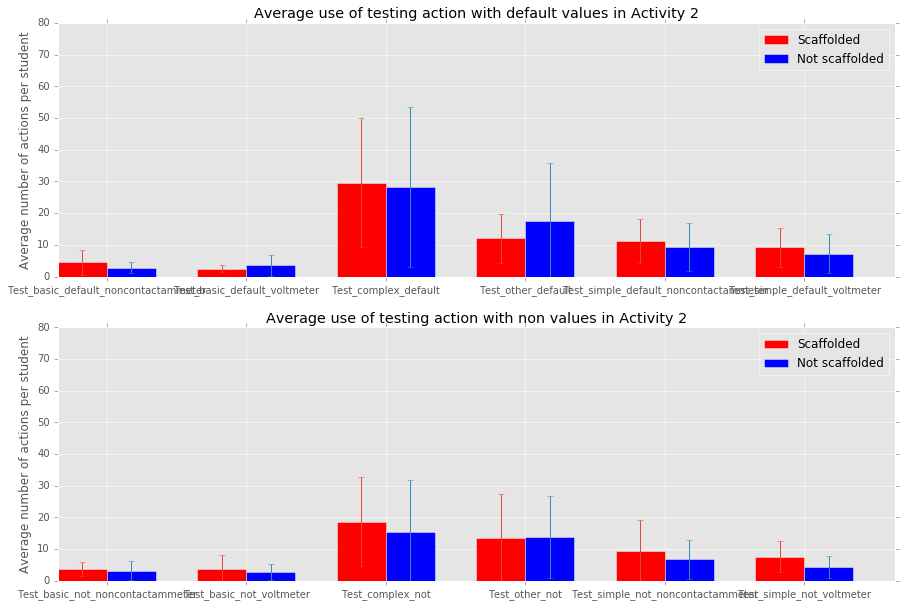

In [39]:
default_categories = ['Test_complex_default','Test_other_default','Test_basic_default_voltmeter','Test_basic_default_noncontactammeter','Test_simple_default_noncontactammeter','Test_simple_default_voltmeter']
not_categories = ['Test_basic_not_noncontactammeter','Test_basic_not_voltmeter','Test_simple_not_voltmeter','Test_simple_not_noncontactammeter','Test_complex_not','Test_other_not']
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df[df["Family"].isin(default_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df[df["Family"].isin(not_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("scaffolding",'scaff')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("scaffolding",'not')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('Scaffolded', 'Not scaffolded'))
ax.set_ylim([0, 80])

(0, 80)

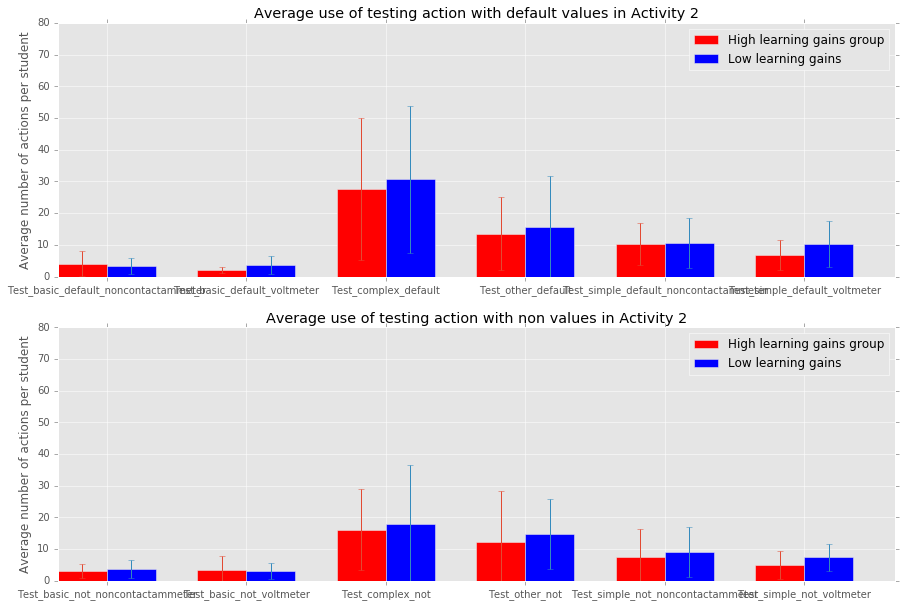

In [40]:
default_categories = ['Test_complex_default','Test_other_default','Test_basic_default_voltmeter','Test_basic_default_noncontactammeter','Test_simple_default_noncontactammeter','Test_simple_default_voltmeter']
not_categories = ['Test_basic_not_noncontactammeter','Test_basic_not_voltmeter','Test_simple_not_voltmeter','Test_simple_not_noncontactammeter','Test_complex_not','Test_other_not']
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df[df["Family"].isin(default_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df[df["Family"].isin(not_categories)].copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['Family'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

(0, 80)

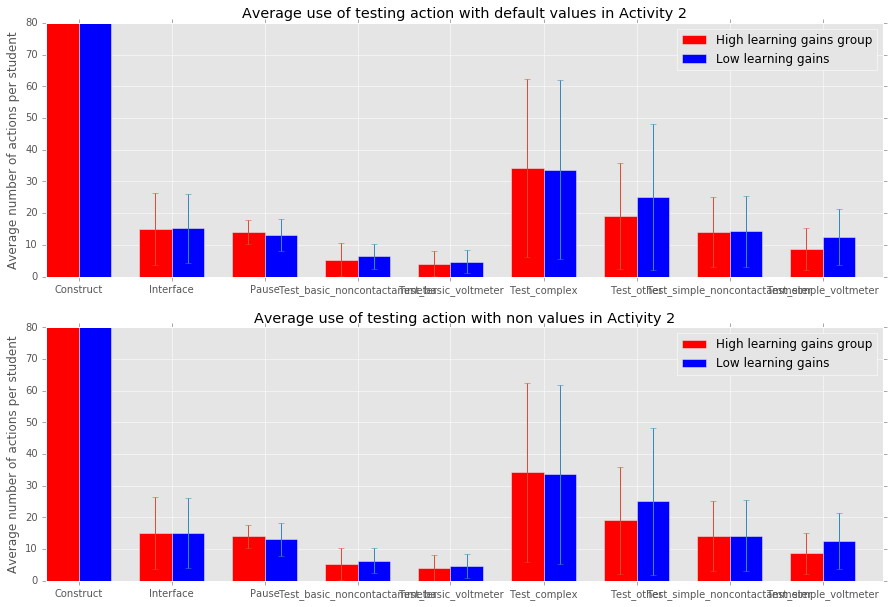

In [49]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df.copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged1'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged1'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df.copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged1'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged1'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

(0, 80)

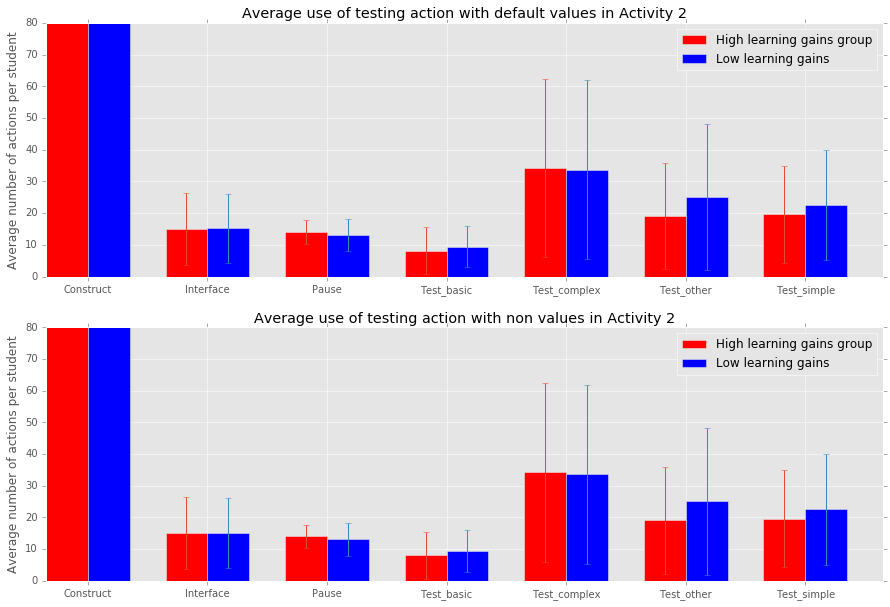

In [50]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,10))

ax = axs[0]
df_copy = df.copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged2'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged2'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with default values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

ax = axs[1]
df_copy = df.copy()
df_copy['D'] = 1
width = 0.35
students = get_students("learning2",'high')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged2'],columns=['student'], aggfunc=np.sum)
N=len(table.mean(axis=1, skipna=True))
rec1 = ax.bar(np.arange(N), table.mean(axis=1, skipna=True), width, color='r', yerr=table.std(axis=1, skipna=True))
students = get_students("learning2",'low')
table = pd.pivot_table(df_copy[df_copy['student'].isin(students)], values='D', index=['FamilyMerged2'],columns=['student'], aggfunc=np.sum)
rec2 = ax.bar(np.arange(N)+width, table.mean(axis=1, skipna=True),width,color='b',yerr = table.std(axis=1, skipna=True))
ax.set_xticks(np.arange(N) + width)
ax.set_xticklabels(table.mean(axis=1, skipna=True).keys())
ax.set_ylabel('Average number of actions per student')
ax.set_title('Average use of testing action with non values in Activity 2')
ax.legend((rec1, rec2), ('High learning gains group', 'Low learning gains'))
ax.set_ylim([0, 80])

### Circuit complexity analysis
Let's look at how complex their circuitboards became

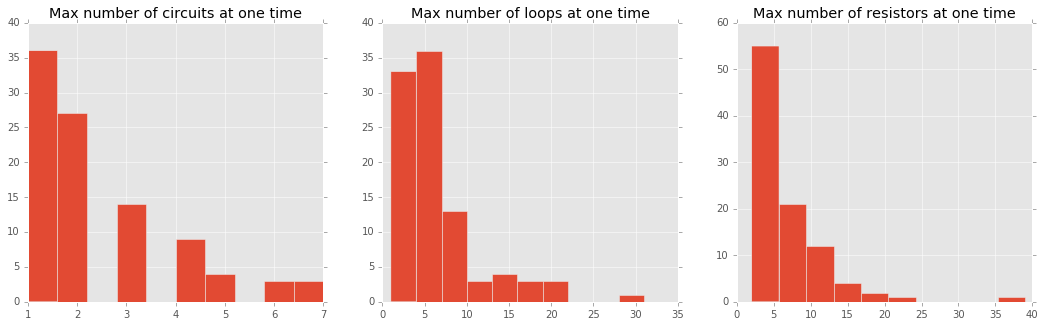

In [44]:
fig, axs = plt.subplots(1,3, figsize=(18,5))
table1 = pd.pivot_table(df, values='#circuits',columns=['student'], aggfunc=np.max); table1.hist(ax=axs[0])
axs[0].set_title("Max number of circuits at one time")
table2 = pd.pivot_table(df, values='current_#loops',columns=['student'], aggfunc=np.max); table2.hist(ax=axs[1])
axs[1].set_title("Max number of loops at one time")
table3 = pd.pivot_table(df, values='#resistor',columns=['student'], aggfunc=np.max); table3.hist(ax=axs[2])
axs[2].set_title("Max number of resistors at one time")

In [42]:
df.columns

Index([u'Activity', u'student', u'Time Stamp', u'Family', u'Action',
       u'Component', u'Outcome', u'#circuits', u'#circuits_w_battery',
       u'#loops', u'#components', u'#battery', u'#circuitSwitch',
       u'#grabBagResistor', u'#lightBulb', u'#resistor', u'#seriesAmmeter',
       u'current_is_circuit', u'current_#loops', u'current_#components',
       u'current_#battery', u'current_#circuitSwitch',
       u'current_#grabBagResistor', u'current_#lightBulb',
       u'current_#resistor', u'current_#seriesAmmeter',
       u'non_default_resistor_values', u'FamilyMerged'],
      dtype='object')

What about the types of circuits they tested on?

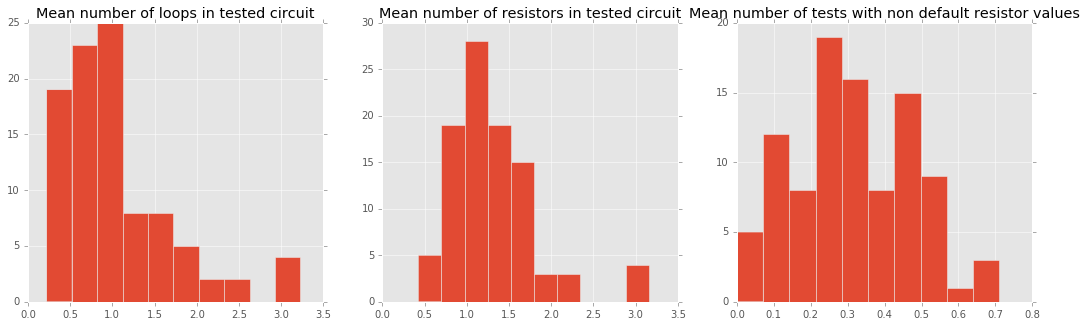

In [43]:
df_tests = df[df['Family'].isin(['Test_complex_default','Test_other_default','Test_basic_default_voltmeter','Test_basic_default_noncontactammeter','Test_simple_default_noncontactammeter','Test_simple_default_voltmeter','Test_basic_not_noncontactammeter','Test_basic_not_voltmeter','Test_simple_not_voltmeter','Test_simple_not_noncontactammeter','Test_complex_not','Test_other_not'])]
fig, axs = plt.subplots(1,3, figsize=(18,5))
table1 = pd.pivot_table(df, values='current_#loops',columns=['student'], aggfunc=np.mean); table1.hist(ax=axs[0])
axs[0].set_title("Mean number of loops in tested circuit")
table2 = pd.pivot_table(df, values='current_#resistor',columns=['student'], aggfunc=np.mean); table2.hist(ax=axs[1])
axs[1].set_title("Mean number of resistors in tested circuit")
table3 = pd.pivot_table(df, values='non_default_resistor_values',columns=['student'], aggfunc=np.mean); table3.hist(ax=axs[2])
axs[2].set_title("Mean number of tests with non default resistor values")

### What kind of circuits did students test with different components?

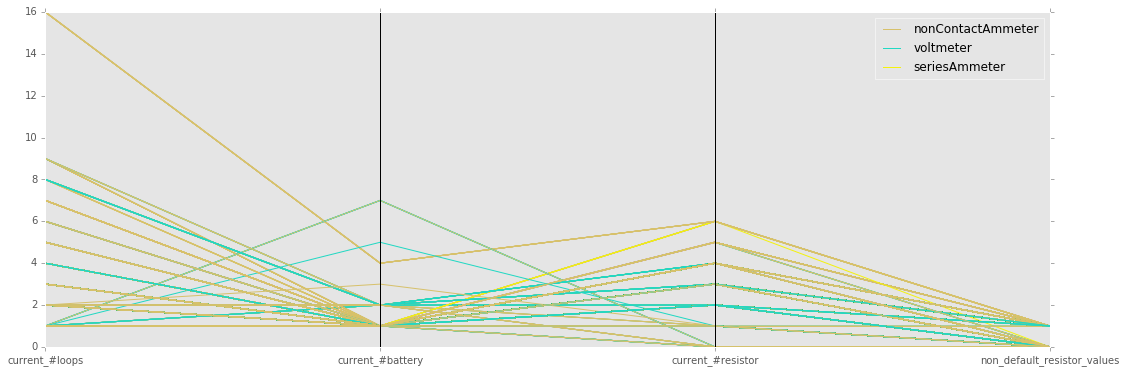

In [18]:
from pandas.tools.plotting import parallel_coordinates
plt.subplots(1,1, figsize=(18,6))
df_tests = df_tests.dropna()
df_high = df_tests[df_tests['student'].isin(get_students("learning2","high"))]
df_low = df_tests[df_tests['student'].isin(get_students("learning2","low"))]
parallel_coordinates(df_high[['Component','current_#loops','current_#battery','current_#resistor','non_default_resistor_values']],"Component")

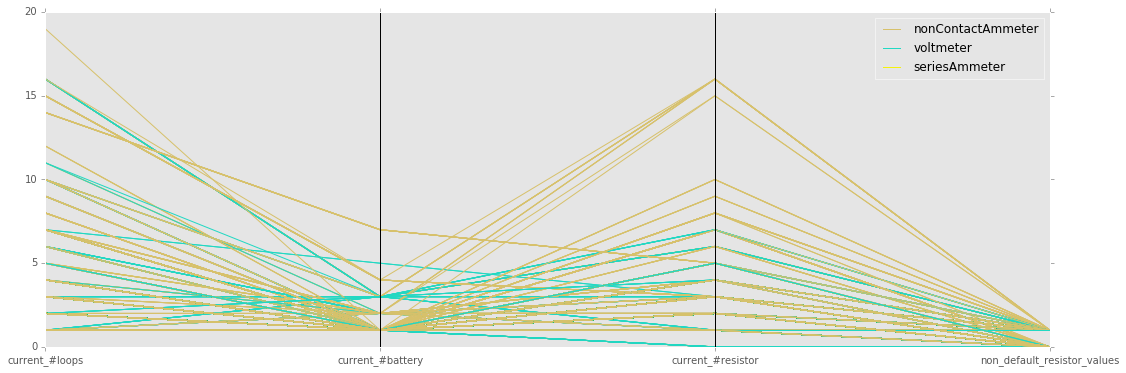

In [19]:
plt.subplots(1,1, figsize=(18,6))
parallel_coordinates(df_low[['Component','current_#loops','current_#battery','current_#resistor','non_default_resistor_values']],"Component")

Next let's look at how many different circuits the students make, and their complexity, per activity.

In [20]:
# fig, axs = plt.subplots(1,2, figsize=(18,5))
# bins = np.linspace(0, 25, 25)
# ax=axs[0]
# df2 = df[df['Activity']=="a1"]
# students = get_students("scaffolding",'scaff')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
# students = get_students("scaffolding",'not')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 1')

# ax=axs[1]
# df2 = df[df['Activity']=="a2"]
# students = get_students("scaffolding",'scaff')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Scaffolded", normed=True)
# students = get_students("scaffolding",'not')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "Not scaffolded", normed=True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 2')

In [21]:
# fig, axs = plt.subplots(1,2, figsize=(18,5))
# bins = np.linspace(0, 25, 25)
# ax=axs[0]
# df2 = df[df['Activity']=="a1"]
# students = get_students("Clustergroups",'knowledge')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
# students = get_students("Clustergroups",'attitude')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 1')

# ax=axs[1]
# df2 = df[df['Activity']=="a2"]
# students = get_students("Clustergroups",'knowledge')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior knowledge", normed = True)
# students = get_students("Clustergroups",'attitude')
# circuits = get_circuits(df2, students)
# ax.hist([len(s) for s in circuits.values()], bins, alpha = 0.4, label= "High prior attitude", normed = True)
# ax.legend(loc='upper right');ax.xlabel = 'Number of unique circuits';ax.ylabel = 'Count of students'
# ax.set_title('Histogram of number of unique circuits in Activity 2')